<a href="https://colab.research.google.com/github/djhsgfjk/collab/blob/main/Lab1_%D0%A4%D0%B8%D0%BB%D1%8C%D1%82%D1%80%D0%B0%D1%86%D0%B8%D1%8F_%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

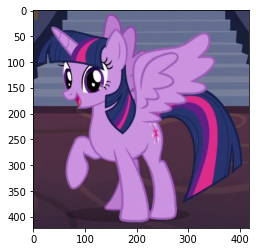

In [105]:
import numpy as np
from PIL import Image
from pylab import *

image=np.array(Image.open('/mlp.png'), dtype=int)
figure()
imshow(image)
show()

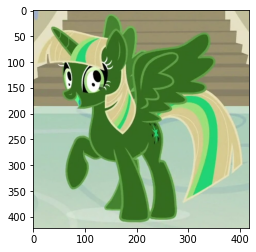

In [106]:
width = image.shape[0]
height = image.shape[1]
invertedImage = np.zeros(width*height*3, dtype=int)
invertedImage.shape = (width, height, 3)
for i in range(width):
    for j in range(height):
        invertedImage[i][j][0] = 255 - image[i][j][0]
        invertedImage[i][j][1] = 255 - image[i][j][1]
        invertedImage[i][j][2] = 255 - image[i][j][2]
figure()
imshow(invertedImage)
show()

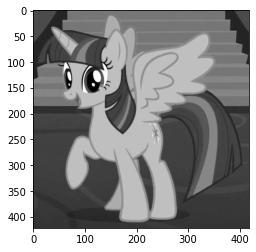

In [107]:
halftoneImage = np.zeros(width*height, dtype=int)
halftoneImage.shape = (width, height)
for i in range(width):
    for j in range(height):
        halftoneImage[i][j] = mean(image[i,j,:])
figure()
imshow(halftoneImage, cmap='gray', vmin=0, vmax=255)
show()

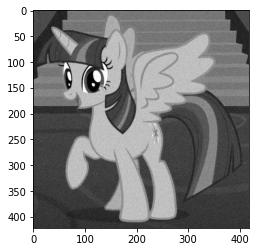

In [110]:
import random

noiseImage = np.zeros(width*height, dtype=int)
noiseImage.shape = (width, height)
for i in range(width):
    for j in range(height):
        if(random.random()<0.5):
            noiseImage[i,j] = halftoneImage[i,j] + random.gauss(0,10)
        else:
            noiseImage[i,j] = halftoneImage[i,j]

noiseImage = clip(noiseImage, 0, 255)
imshow(noiseImage, cmap='gray', vmin=0, vmax=255)
show()

<BarContainer object of 256 artists>

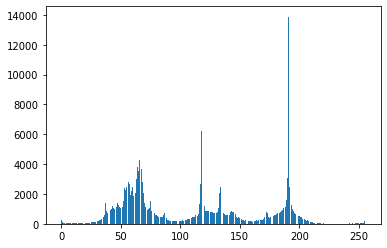

In [162]:
def draw_histogram(image_e):
  x_e = np.array(range(0, 256), dtype=int)
  y_e = np.zeros(256, dtype=int)
  width_e = image_e.shape[0]
  height_e = image_e.shape[1]

  for i in range(0, width_e):
    for j in range(0, height_e):
      y_e[image_e[i, j]] += 1

  return x_e, y_e 

x, y = draw_histogram(noiseImage)
figure()
bar(x,y)

In [112]:
mu = np.sum(noiseImage)/(width*height)
sigma2 = np.sum(np.power(noiseImage-mu, 2))/(width*height)
print(mu, np.sqrt(sigma2))

111.22906982017733 55.83844167422412


In [153]:
def build_G(sigma2_e):
  const1 = 2*sigma2_e
  const2 = 2*np.pi*sigma2_e

  G = np.zeros(9, dtype=np.float64)
  G.shape = (3, 3)

  for i in range(3):
    for j in range(3):
      G[i, j] = np.power(np.e, -((i-3//2)**2 + (j-3//2)**2)/const1)/const2

  G /= np.sum(G)
  return G

G = build_G(sigma2)
print(G)    

[[0.11109923 0.11111705 0.11109923]
 [0.11111705 0.11113487 0.11111705]
 [0.11109923 0.11111705 0.11109923]]


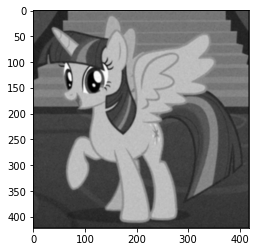

In [155]:
def Gaussian_filtering(image_e):
  width_e = image_e.shape[0]
  height_e = image_e.shape[1]

  gaussImage = np.zeros(width_e*height_e, dtype=int)
  gaussImage.shape = (width_e, height_e)

  image_eCopy = np.zeros((width_e+1)*(height_e+1), dtype=int)
  image_eCopy.shape = ((width_e+1),(height_e+1))


  for i in range(width_e):
      for j in range(height_e):
        image_eCopy[i+1, j+1] = image_e[i, j]

  for i in range(1, width_e-1):
      for j in range(1, height_e-1):
        gaussImage[i, j] = np.sum(G * image_eCopy[i-1:i+2, j-1:j+2])

  gaussImage = clip(gaussImage, 0, 255)     
  return gaussImage 

gaussImage = Gaussian_filtering(noiseImage)
figure()
imshow(gaussImage, cmap='gray', vmin=0, vmax=255)

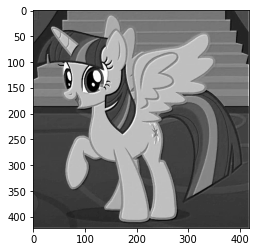

In [156]:
gaussImage = Gaussian_filtering(halftoneImage)
unsharpImage = 2*halftoneImage - gaussImage
unsharpImage = clip(unsharpImage, 0, 255)

figure()
imshow(unsharpImage, cmap='gray', vmin=0, vmax=255)

In [149]:
def histogram_equalization(histogram_e, image_e):
    lut_e = np.zeros(256, dtype=int)
    sum_temp = 0
    cf = []
    for i in histogram_e:
        sum_temp += i
        cf.append(sum_temp)
    for i, v in enumerate(lut_e):
        lut_e[i] = int(255.0 * (cf[i] / sum_temp) + 0.5)
    image_e = clip(image_e, 0, 255)
    equalization_result = lut_e[image_e]
    return equalization_result

<BarContainer object of 256 artists>

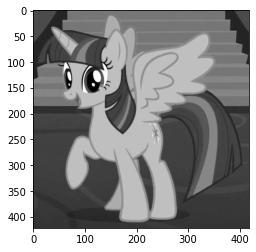

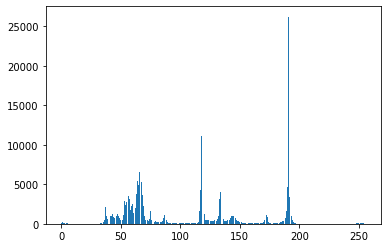

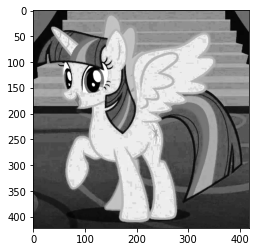

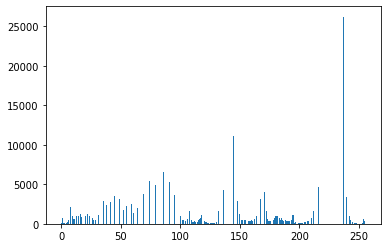

In [164]:
figure()
imshow(halftoneImage, cmap='gray', vmin=0, vmax=255)

x, y1 = draw_histogram(halftoneImage)
figure()
bar(x,y1)

result = histogram_equalization(y, halftoneImage)
figure()
imshow(result, cmap='gray', vmin=0, vmax=255)

x, y2 = draw_histogram(result)
figure()
bar(x,y2)